<a href="https://colab.research.google.com/github/RahulDogra-92/Machine-Learning-Scientist/blob/main/Feature_Selection_in_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Feature selection is a technique where we choose those features in our data that contribute most to the target variable. In other words we choose the best predictors for the target variable.

The classes in the sklearn.feature_selection module can be used for feature selection/dimensionality reduction on sample sets, either to improve estimators’ accuracy scores or to boost their performance on very high-dimensional datasets.

Advantage: Refer this link for a nice article on this by Jason Brownlee

 - Reduces Overfitting: Less redundant data means less possibility of making decisions based on redundant data/noise.

 - Improves Accuracy: Less misleading data means modeling accuracy improves.

 - Reduces Training Time: Less data means that algorithms train faster.

#Imports


In [85]:
import pandas as pd
import numpy as np

In [86]:
data_reg = pd.read_csv('/content/50_Startups.csv') # for regression problem
data_clf = pd.read_csv('/content/Iris.csv') # for classification problem


In [87]:
# Check first five datapoints by using head() method
print(data_clf.head(2))
print(data_reg.head(2))


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
   R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.2       136897.80        471784.10    New York  192261.83
1   162597.7       151377.59        443898.53  California  191792.06


In [88]:
data_clf=data_clf.drop(['Id'],axis=1)
data_reg=data_reg.drop(['State'],axis=1)

In [89]:
# Create feature and target variable for Classification problem
X_clf=data_clf.drop(['Species'],axis=1) # features: SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'
y_clf=data_clf.Species # Target variable: Iris species

In [90]:
# Create feature and target variable for Regression problem
X_reg=data_reg.drop(['Profit'],axis=1) # features: 
y_reg=data_reg.Profit # Target variable: Is_Lead

In [91]:
# Import SelectKBest, chi2(score function for classification), f_regression (score function for regression)
from sklearn.feature_selection import SelectKBest, chi2, f_regression

In [92]:
# Create the object for SelectKBest and fit and transform the classification data
# k is the number of features you want to select [here it's 2]
X_clf_new=SelectKBest(score_func=chi2,k=2).fit_transform(X_clf,y_clf)

In [93]:
# Check the newly created variable for top two best features
print(X_clf_new[:5])

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]


In [94]:
# Compare the newly created values with feature set values to know the selected features
print(X_clf.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


From the above we see that the best two predictors for Iris species are:

 - PetalLengthCm

 - PetalWidthCm

In [95]:
# Create the object for SelectKBest and fit and transform the regression data
X_reg_new=SelectKBest(score_func=f_regression, k=2).fit_transform(X_reg,y_reg)

In [96]:
# Check the newly created variable for top two best features
print(X_reg_new[:5])

[[165349.2  471784.1 ]
 [162597.7  443898.53]
 [153441.51 407934.54]
 [144372.41 383199.62]
 [142107.34 366168.42]]


In [97]:
# Compare the newly created values with feature set values to know the selected features
print(X_reg.head())

   R&D Spend  Administration  Marketing Spend
0  165349.20       136897.80        471784.10
1  162597.70       151377.59        443898.53
2  153441.51       101145.55        407934.54
3  144372.41       118671.85        383199.62
4  142107.34        91391.77        366168.42


From the above we see that the best two predictors for start up profit are:

 - R&D Spend

 - Marketing Spend

2. Feature Importance

You can get the feature importance of each feature of your dataset by using the feature importance property of the model.
Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

[0.0866954  0.05128989 0.41857574 0.44343897]


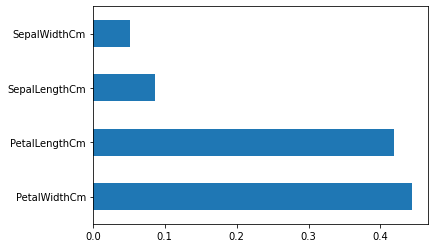

In [104]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_clf,y_clf)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_clf.columns)
feat_importances.nlargest(4).plot(kind='barh')
plt.show()